In [7]:

import sys

# Add the parent directory to the Python path
sys.path.append("synderm/synderm/")

from utils.helpers import tokenize_prompt

from torch.utils.data import Dataset
from torchvision import transforms
from pathlib import Path
import os

In [9]:
# TODO: create a very simple pytorch dataset with a train/test split
class CustomDataset(Dataset):
    def __init__(self, dataset_dir, split="train"):
        self.dataset_dir = Path(dataset_dir)
        self.image_paths = []
        self.labels = []
        self.transform = transforms.Compose([
            transforms.ToTensor()
        ])
        self.split = split

        # Walk through class folders
        data_dir = self.dataset_dir / self.split
        for class_name in os.listdir(data_dir):
            class_dir = data_dir / class_name
            if not class_dir.is_dir():
                continue
                
            # Get all png images in this class folder
            for img_name in os.listdir(class_dir):
                if img_name.lower().endswith('.png'):
                    self.image_paths.append(class_dir / img_name)
                    self.labels.append(class_name)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        label = self.labels[idx]
        
        # Load and convert image to RGB
        image = Image.open(image_path).convert('RGB')
        # Convert to tensor
        image = self.transform(image)
        image_name = image_path.stem

        return {"id": image_name, "image": image, "label": label}



In [21]:
test = CustomDataset(dataset_dir="sample_dataset", split="val")

Image ID: 0001, Image Label: allergic-contact-dermatitis

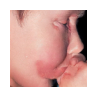

In [23]:
import matplotlib.pyplot as plt

for item in test:
    print(f"Image ID: {item['id']}, Image Label: {item['label']}")
    img = item["image"]
    plt.figure(figsize=(1, 1))
    plt.imshow(img.permute(1,2,0))
    plt.axis('off')
    plt.show()
    break

In [24]:
len(test.image_paths)

320